In [1]:
# 로그파일 (비정형 데이터) -> 정형 데이터 형식
import re
import csv

# 로그 파일 경로
log_file_path = 'sample_logs.log'
output_csv_path = 'parsed_logs.csv'

In [2]:
# 정규 표현식 패턴 정의
log_pattern = re.compile(
r'(?P<ip>\d+\.\d+\.\d+\.\d+)\s' # IP 주소
r'- - \[(?P<datetime>[^\]]+)\] ' # 날짜 및 시간
r'"(?P<method>GET|POST|PUT|DELETE|HEAD) ' # HTTP 메서드
r'(?P<path>[^ ]+).*?"\s' # 요청 경로
r'(?P<status>\d{3})\s' # 상태 코드
r'(?P<size>\d+)' # 응답 크기
)
# (?P<이름>패턴) 형태는 "이름이 있는 그룹" 으로, 추출 결과를 딕셔너리처럼
# groupdict()로 관리할 수 있게 해줍니다.

In [3]:
# 파싱된 결과 저장 리스트
parsed_logs = []

# 로그 파일 읽기 및 정규식 적용
with open(log_file_path, 'r') as f:
    for line in f:
        match = log_pattern.search(line)
        if match:
            parsed_logs.append(match.groupdict())

In [4]:
parsed_logs

[{'ip': '172.29.117.82',
  'datetime': '14/Jun/2025:10:59:11 +0900',
  'method': 'GET',
  'path': '/home.php',
  'status': '200',
  'size': '189'},
 {'ip': '10.248.203.131',
  'datetime': '14/Jun/2025:11:21:30 +0900',
  'method': 'GET',
  'path': '/admin/login.php',
  'status': '403',
  'size': '1024'},
 {'ip': '172.25.180.188',
  'datetime': '14/Jun/2025:11:55:08 +0900',
  'method': 'GET',
  'path': '/admin/login.php',
  'status': '404',
  'size': '2048'},
 {'ip': '172.22.253.123',
  'datetime': '14/Jun/2025:11:18:27 +0900',
  'method': 'GET',
  'path': '/dashboard',
  'status': '403',
  'size': '512'},
 {'ip': '192.168.71.140',
  'datetime': '14/Jun/2025:10:38:19 +0900',
  'method': 'GET',
  'path': '/admin/login.php',
  'status': '404',
  'size': '512'},
 {'ip': '10.128.66.93',
  'datetime': '14/Jun/2025:10:35:59 +0900',
  'method': 'GET',
  'path': '/home.php',
  'status': '404',
  'size': '1024'},
 {'ip': '192.168.75.62',
  'datetime': '14/Jun/2025:10:38:37 +0900',
  'method': 'GE

In [5]:
# CSV로 저장
with open(output_csv_path, 'w', newline='') as csvfile:
    fieldnames = ['ip', 'datetime', 'method', 'path', 'status', 'size']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for entry in parsed_logs:
        writer.writerow(entry)
print("보안 로그가 CSV로 저장되었습니다:", output_csv_path)

보안 로그가 CSV로 저장되었습니다: parsed_logs.csv


In [6]:
# csv -> pd DataFrame

import pandas as pd

In [7]:
df = pd.read_csv('parsed_logs.csv')

In [8]:
df

,ip,datetime,method,path,status,size
0,172.29.117.82,14/Jun/2025:10:59:11 +0900,GET,/home.php,200,189
1,10.248.203.131,14/Jun/2025:11:21:30 +0900,GET,/admin/login.php,403,1024
2,172.25.180.188,14/Jun/2025:11:55:08 +0900,GET,/admin/login.php,404,2048
3,172.22.253.123,14/Jun/2025:11:18:27 +0900,GET,/dashboard,403,512
4,192.168.71.140,14/Jun/2025:10:38:19 +0900,GET,/admin/login.php,404,512
...,...,...,...,...,...,...
495,172.21.22.154,14/Jun/2025:10:59:51 +0900,GET,/index.html,404,1024
496,192.168.145.66,14/Jun/2025:11:55:58 +0900,GET,/logout,404,1024
497,192.168.188.143,14/Jun/2025:11:42:06 +0900,GET,/dashboard,200,768
498,172.27.113.162,14/Jun/2025:10:02:40 +0900,POST,/submit,403,1024


In [ ]:
# 403 
df_1 = df[df['status'] == 403]
print(df_1)

In [ ]:
# /admin/...
acc_admin_df = df[df['path'].str.contains(r'^/admin')]
print(acc_admin_df)

In [15]:
# ip top5
top_ips = df.groupby('ip').size().reset_index(name='count').sort_values(by='count')
print(top_ips.tail(1))

                  ip  count
441  192.168.234.214      2


In [1]:
# 서울시에 위치한 스타벅스 데이터
import pandas as pd

In [2]:
data = pd.read_csv('20250531.csv', encoding='cp949', low_memory=False)

In [3]:
data.head(3)

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온,습도,재비산먼지 평균농도,오염범례
0,2025-05-02,14:17,서울,강북구,인수봉로,서울특별시 강북구 수유동 565-1도,서울특별시 강북구 미아동 1354-12 도,18,34,12,매우좋음
1,2025-05-02,14:08,서울,강북구,솔샘로,서울특별시 강북구 미아동 1353-13 공,서울특별시 강북구 미아동 231도,19,33,10,매우좋음
2,2025-05-02,13:39,서울,강북구,한천로,서울특별시 강북구 수유동 279-7 도,서울특별시 강북구 번동 612-3천,20,32,6,매우좋음


In [4]:
data.tail()

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온,습도,재비산먼지 평균농도,오염범례
1120,2025-05-30,12:10,경기,여주시,신륵로,경기도 여주시 천송동 30-22도,경기도 여주시 천송동 561-5도,23,49,8,매우좋음
1121,2025-05-30,12:01,경기,여주시,여양로,경기도 여주시 홍문동 290-1도,경기도 여주시 대신면 천서리 754도,23,47,14,매우좋음
1122,2025-05-30,11:52,경기,여주시,우암로,경기도 여주시 하동 195-1도,경기도 여주시 월송동 416도,23,47,13,매우좋음
1123,2025-05-30,11:32,경기,여주시,세종로,경기도 여주시 점봉동 230-14도,경기도 여주시 홍문동 86도,22,49,4,매우좋음
1124,2025-05-30,11:26,경기,여주시,명품로,경기도 여주시 상거동 465 도,경기도 여주시 점봉동 327-2도,21,49,5,매우좋음


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   측정일자        1125 non-null   object
 1   측정시간        1125 non-null   object
 2   지역          1125 non-null   object
 3   지역명         1125 non-null   object
 4   도로명         1125 non-null   object
 5   시작점         1125 non-null   object
 6   종점          1125 non-null   object
 7   기온          1125 non-null   int64 
 8   습도          1125 non-null   int64 
 9   재비산먼지 평균농도  1125 non-null   int64 
 10  오염범례        1125 non-null   object
dtypes: int64(3), object(8)
memory usage: 96.8+ KB


In [24]:
data.describe()

,번호,개방자치단체코드,인허가취소일자,영업상태구분코드,상세영업상태코드,휴업시작일자,휴업종료일자,재개업일자,소재지면적,도로명우편번호,...,총직원수,본사직원수,공장사무직직원수,공장판매직직원수,공장생산직직원수,보증액,월세액,시설총규모,홈페이지,Unnamed: 47
count,602907.000000,6.029070e+05,0.0,602907.000000,602907.000000,0.0,0.0,0.0,553700.000000,449585.000000,...,260166.0,264440.0,264440.0,264440.0,264440.0,264440.0,264440.0,601019.000000,0.0,0.0
mean,301454.000000,4.060419e+06,NaN,2.335191,1.667595,NaN,NaN,NaN,51.949812,28013.466615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.636721,NaN,NaN
std,174044.403711,8.822240e+05,NaN,0.942151,0.471075,NaN,NaN,NaN,304.737473,18789.829211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292.872973,NaN,NaN
min,1.000000,3.000000e+06,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,1000.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
25%,150727.500000,3.310000e+06,NaN,1.000000,1.000000,NaN,NaN,NaN,15.000000,10937.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,NaN,NaN
50%,301454.000000,3.820000e+06,NaN,3.000000,2.000000,NaN,NaN,NaN,33.500000,24835.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.290000,NaN,NaN
75%,452180.500000,4.681000e+06,NaN,3.000000,2.000000,NaN,NaN,NaN,62.840000,44703.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.000000,NaN,NaN
max,602907.000000,6.520000e+06,NaN,3.000000,2.000000,NaN,NaN,NaN,111113.520000,63644.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111113.520000,NaN,NaN


In [25]:
data.shape

(602907, 48)

In [26]:
data.columns

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보x(epsg5174)',
       '좌표정보y(epsg5174)', '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명',
       '급수시설구분명', '총직원수', '본사직원수', '공장사무직직원수', '공장판매직직원수', '공장생산직직원수',
       '건물소유구분명', '보증액', '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식',
       '홈페이지', 'Unnamed: 47'],
      dtype='object')

In [28]:
print(data.columns.tolist())
print(data.columns.values)

['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호', '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보x(epsg5174)', '좌표정보y(epsg5174)', '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총직원수', '본사직원수', '공장사무직직원수', '공장판매직직원수', '공장생산직직원수', '건물소유구분명', '보증액', '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지', 'Unnamed: 47']
['번호' '개방서비스명' '개방서비스아이디' '개방자치단체코드' '관리번호' '인허가일자' '인허가취소일자' '영업상태구분코드'
 '영업상태명' '상세영업상태코드' '상세영업상태명' '폐업일자' '휴업시작일자' '휴업종료일자' '재개업일자' '소재지전화'
 '소재지면적' '소재지우편번호' '소재지전체주소' '도로명전체주소' '도로명우편번호' '사업장명' '최종수정시점' '데이터갱신구분'
 '데이터갱신일자' '업태구분명' '좌표정보x(epsg5174)' '좌표정보y(epsg5174)' '위생업태명' '남성종사자수'
 '여성종사자수' '영업장주변구분명' '등급구분명' '급수시설구분명' '총직원수' '본사직원수' '공장사무직직원수'
 '공장판매직직원수' '공장생산직직원수' '건물소유구분명' '보증액' '월세액' '다중이용업소여부' '시설총규모' '전통업소지정번호'
 '전통업소주된음식' '홈페이지' 'Unnamed: 47']


In [37]:
data_1 = data[['번호', '영업상태명', '영업상태구분코드', '사업장명', '소재지전체주소', '도로명전체주소']]

In [39]:
data_1.head()

,번호,영업상태명,영업상태구분코드,사업장명,소재지전체주소,도로명전체주소
0,1,폐업,3,팥붕슈붕,인천광역시 중구 운서동 2874 파라다이스시티 플라자 1층,"인천광역시 중구 영종해안남로321번길 186, 파라다이스시티 플라자 1층 (운서동)"
1,2,폐업,3,헤이븐(haven),서울특별시 금천구 가산동 345-2,"서울특별시 금천구 가산디지털1로 100, 1층 117호 (가산동)"
2,3,폐업,3,리은푸드,대구광역시 중구 계산동2가 0200 현대백화점 지하1층,"대구광역시 중구 달구벌대로 2077, 현대백화점 지하1층 (계산동2가)"
3,4,폐업,3,(주)파파밸리,경기도 하남시 신장동 616 스타필드 하남,"경기도 하남시 미사대로 750, 신세계백화점 스타필드 하남 지하1층 (신장동)"
4,5,폐업,3,이안만두,경기도 하남시 신장동 616 스타필드 하남,"경기도 하남시 미사대로 750, 스타필드 하남 신세계백화점 지하2층 일부호 (신장동)"


In [40]:
# 소재지 기준으로 값이 Na인 행을 삭제
data_1 = data_1.dropna(subset=['소재지전체주소'])

In [41]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 601073 entries, 0 to 602906
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   번호        601073 non-null  int64 
 1   영업상태명     601073 non-null  object
 2   영업상태구분코드  601073 non-null  int64 
 3   사업장명      601073 non-null  object
 4   소재지전체주소   601073 non-null  object
 5   도로명전체주소   457573 non-null  object
dtypes: int64(2), object(4)
memory usage: 32.1+ MB


In [42]:
data_2 = data_1[data_1['소재지전체주소'].str.contains('서울특별시')]

In [44]:
data_2.head(3)

,번호,영업상태명,영업상태구분코드,사업장명,소재지전체주소,도로명전체주소
1,2,폐업,3,헤이븐(haven),서울특별시 금천구 가산동 345-2,"서울특별시 금천구 가산디지털1로 100, 1층 117호 (가산동)"
7,8,폐업,3,(주)갑성(한시적),서울특별시 강남구 압구정동 429 현대백화점본점,"서울특별시 강남구 압구정로 165, 현대백화점 압구정점 지하1층 행사장 (압구정동)"
8,9,폐업,3,더프리미엄(한시적),서울특별시 강남구 압구정동 429 현대백화점본점,"서울특별시 강남구 압구정로 165, 현대백화점본점 지하1층 (압구정동)"


In [45]:
data_3 = data_2[data_2['사업장명'].str.contains('스타벅스')]

In [46]:
data_3.head()

,번호,영업상태명,영업상태구분코드,사업장명,소재지전체주소,도로명전체주소
10601,10602,폐업,3,스타벅스 대치재경빌딩B1,서울특별시 강남구 대치동 599 대원빌딩,"서울특별시 강남구 남부순환로 2947, 대원빌딩 지하1층 (대치동)"
11692,11693,폐업,3,스타벅스 명동센트럴점,서울특별시 중구 명동1가 10-1 명동센트럴빌딩 1층-중2층,"서울특별시 중구 명동9길 16, 명동센트럴빌딩 1층-중2층 (명동1가)"
14356,14357,폐업,3,스타벅스커피홍대공원점,"서울특별시 마포구 서교동 362-1번지 1층일부, 2층","서울특별시 마포구 와우산로 83 (서교동, 1층일부, 2층)"
15107,15108,폐업,3,스타벅스커피서교점,서울특별시 마포구 서교동 395-166 1층일부,"서울특별시 마포구 양화로 78 (서교동, 1층일부)"
16312,16313,폐업,3,스타벅스 뱅뱅사거리점,"서울특별시 강남구 도곡동 946-14 지상1,2,3층","서울특별시 강남구 강남대로 282 (도곡동,지상1,2,3층)"


In [47]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 806 entries, 10601 to 595790
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   번호        806 non-null    int64 
 1   영업상태명     806 non-null    object
 2   영업상태구분코드  806 non-null    int64 
 3   사업장명      806 non-null    object
 4   소재지전체주소   806 non-null    object
 5   도로명전체주소   748 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.1+ KB


In [48]:
data_4 = data_3[data_3['영업상태명'] != '폐업']

In [50]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630 entries, 402499 to 595790
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   번호        630 non-null    int64 
 1   영업상태명     630 non-null    object
 2   영업상태구분코드  630 non-null    int64 
 3   사업장명      630 non-null    object
 4   소재지전체주소   630 non-null    object
 5   도로명전체주소   626 non-null    object
dtypes: int64(2), object(4)
memory usage: 34.5+ KB


In [52]:
data_4.head(3)

,번호,영업상태명,영업상태구분코드,사업장명,소재지전체주소,도로명전체주소
402499,402500,영업/정상,1,스타벅스 신촌로점,서울특별시 서대문구 창천동 29-81 신촌르메이에르타운5,"서울특별시 서대문구 신촌로 109, 신촌르메이에르타운5 1층 103-2,103-3호..."
403301,403302,영업/정상,1,스타벅스 김포공항 국제선점,서울특별시 강서구 방화동 882-1,"서울특별시 강서구 하늘길 38, 김포공항 국제선터미널 출국장 3층 (방화동)"
403590,403591,영업/정상,1,스타벅스 서대문적십자점,서울특별시 종로구 평동 164 서울적십자병원,"서울특별시 종로구 새문안로 9, 서울적십자병원 별관 1층 B호 (평동)"


In [55]:
data_4.loc[:, '시군구'] = data_4['소재지전체주소'].str.split().str[1]

In [56]:
data_4.head(3)

,번호,영업상태명,영업상태구분코드,사업장명,소재지전체주소,도로명전체주소,시군구
402499,402500,영업/정상,1,스타벅스 신촌로점,서울특별시 서대문구 창천동 29-81 신촌르메이에르타운5,"서울특별시 서대문구 신촌로 109, 신촌르메이에르타운5 1층 103-2,103-3호...",서대문구
403301,403302,영업/정상,1,스타벅스 김포공항 국제선점,서울특별시 강서구 방화동 882-1,"서울특별시 강서구 하늘길 38, 김포공항 국제선터미널 출국장 3층 (방화동)",강서구
403590,403591,영업/정상,1,스타벅스 서대문적십자점,서울특별시 종로구 평동 164 서울적십자병원,"서울특별시 종로구 새문안로 9, 서울적십자병원 별관 1층 B호 (평동)",종로구


In [57]:
data_5 = data_4.groupby('시군구').size().reset_index(name='사업장수')

In [58]:
data_5

,시군구,사업장수
0,강남구,92
1,강동구,20
2,강북구,7
3,강서구,32
4,관악구,14
5,광진구,19
6,구로구,14
7,금천구,14
8,노원구,15
9,도봉구,7


In [59]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

In [61]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [62]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

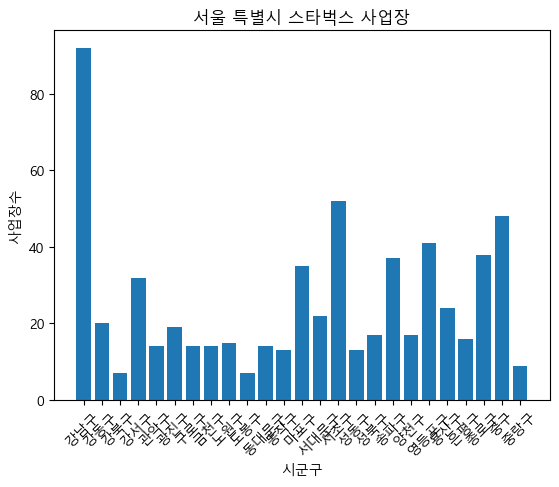

In [ ]:
plt.bar(data_5['시군구'], data_5['사업장수'])
plt.xticks(rotation=45)
plt.title('서울 특별시 스타벅스 사업장')
plt.xlabel('시군구')
plt.ylabel('사업장수')

plt.show()

In [66]:
# data
data = {'score' : [70,75,80,85,90,150]}
df = pd.DataFrame(data)
print(df)

   score
0     70
1     75
2     80
3     85
4     90
5    150


In [70]:
# IQR
Q1 = df['score'].quantile(0.25)
print(Q1)
Q3 = df['score'].quantile(0.75)
print(Q3)
IQR = Q3-Q1
print(IQR)

76.25
88.75
12.5


In [71]:
# 이상치의 범위
low_ = Q1 - 1.5*IQR
up_ = Q3 + 1.5*IQR

In [73]:
print('이상치의 범위:', f'{low_} 작거나 {up_} 보다 크거나')

이상치의 범위: 57.5 작거나 107.5 보다 크거나


In [75]:
outliers = df[(df['score']<low_) | (df['score']>up_)]
print('제거대상(이상치):', outliers)

제거대상(이상치):    score
5    150


In [76]:
# 이상치 제거
df_1 = df[(df['score']>=low_) & (df['score']<=up_)]
print(df_1)

   score
0     70
1     75
2     80
3     85
4     90


In [78]:
# 이상치 값을 변경
df['score'] = df['score'].astype(float)
df.loc[df['score']<low_, 'score'] = low_
df.loc[df['score']>up_, 'score'] = up_

In [79]:
print(df)

   score
0   70.0
1   75.0
2   80.0
3   85.0
4   90.0
5  107.5


In [ ]:
df.duplicated()

In [1]:
# pandas 중복 데이터 확인 및 제거
import pandas as pd
# 예제 데이터
data = {'Name': ['Alice', 'Bob', 'Alice', 'Charlie', 'Bob'],
        'Age': [25, 30, 25, 35, 30],
        'Score': [85, 90, 85, 95, 90]}

df = pd.DataFrame(data)
print('원본 데이터프레임:')
print(df)

원본 데이터프레임:
      Name  Age  Score
0    Alice   25     85
1      Bob   30     90
2    Alice   25     85
3  Charlie   35     95
4      Bob   30     90


In [7]:
# 중복 모두 삭제
df_3 = df.drop_duplicates(keep=False)
print(df_3)

      Name  Age  Score
3  Charlie   35     95


In [6]:
# 즉정 열('Name')을 기준으로 중복 행 삭제
df_2 = df.drop_duplicates(subset=['Name'], keep='last')
print('2. Name열의 값을 기준으로 행 삭제')
print(df_2)


2. Name열의 값을 기준으로 행 삭제
      Name  Age  Score
2    Alice   25     85
3  Charlie   35     95
4      Bob   30     90


In [4]:
# 중복 데이터 제거 (행의 모든 열의 값이 같은 경우)
df_1 = df.drop_duplicates(keep='last')
print('1. 중복데이터 제거 (첫번째 데이터 유지)')
print(df_1)


1. 중복데이터 제거 (첫번째 데이터 유지)
      Name  Age  Score
2    Alice   25     85
3  Charlie   35     95
4      Bob   30     90


In [1]:
import pandas as pd

In [2]:
data = pd.DataFrame({'Original': [1, 4, 16, 36, 100, 1000, 10000]})

In [3]:
pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/10.7 MB 8.7 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/10.7 MB 8.7 MB/s eta 0:00:01
   ------------------ --------------------- 5.0/10.7 MB 8.2 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.7 MB 8.3 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.7 MB 8.3 MB/s eta 0:00:01
   -------------------------------------- - 10.2/10.7 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 8.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   - -------------------------------------- 1.6/41.0 MB 8.4 MB/s eta 0:00:05
   --- ------------------------------------ 3.4/41.0 MB 8.8 MB/s eta 0:00:05
   ----- ---------------------------------- 5.5/41.0 MB 9.0 MB/s eta 0:00:04
   ------- -------------------------------- 7.3/41.0 MB 9.1 MB/s eta 0:00:04
   --------

In [5]:
from sklearn.preprocessing import StandardScaler # 표준화
from sklearn.preprocessing import MinMaxScaler # 정규화
from sklearn.preprocessing import LabelEncoder # 범주형 데이터 숫자 매핑
from sklearn.preprocessing import OneHotEncoder # 벡터 데이터 형식으로 변환

In [17]:
data1 = pd.DataFrame({'Original': [50, 80, 90, 100, 160]})
data2 = pd.DataFrame({'Fruits': ['사과', '배', '포도', '사과', '포도']})

In [21]:
# 표준화
scaler_1 = StandardScaler()
data1['scale_1'] = scaler_1.fit_transform(data1[['Original']])

scaler_2 = MinMaxScaler()
data1['scale_2'] = scaler_2.fit_transform(data1[['Original']])

In [22]:
data1

,Original,scale_1,scale_2
0,50,-1.273852,0.000000
1,80,-0.443079,0.272727
2,90,-0.166155,0.363636
3,100,0.110770,0.454545
4,160,1.772316,1.000000


In [23]:
# 레이블의 인코딩

encoder_1 = LabelEncoder()
data2['Label Encoding'] = encoder_1.fit_transform(data2['Fruits'])

In [25]:
print(data2)

  Fruits  Label Encoding
0     사과               1
1      배               0
2     포도               2
3     사과               1
4     포도               2


In [31]:
encoder_2 = OneHotEncoder()
onehot_encoded = encoder_2.fit_transform(data2[['Label Encoding']])

In [32]:
onehot_col = encoder_2.get_feature_names_out()
print(onehot_col)

['Label Encoding_0' 'Label Encoding_1' 'Label Encoding_2']


In [33]:
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_col)

ValueError: Shape of passed values is (5, 1), indices imply (5, 3)